# ANÁLISIS DATASETS PRECIO VIVIENDA Y PRECIO VIVIENDA EN ALQUILER

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Para asegurarnos de que la ruta es la correcta:
%ls /content/drive/MyDrive/TFM/

'Clasificacion segunda residencia por nacionalidad.csv'
'DATASETS ADAPTADOS'@
'INCIDENCIA TELETRABAJO POR CCAA.csv'
'INCIDENCIA TELETRABAJO POR DEMOGRAFIA.csv'
'INCIDENCIA TELETRABAJO POR SOCIOECONOMIA.csv'
'INDICES MUNICIPIO SUP 10000 HABITANTES.csv'
 IPV_Anuario2025.csv
 IPVA_ponderaciones_nacionales_por_municipio.csv
 IPVA_ponderaciones_nacionales_por_provincia.csv
 IPVA_ponderaciones_nacionales_por_tamaño.csv
 IPVA_ponderaciones_nacionales_por_tipo_edificacion.csv
 IPVA_por_tamaño.csv
 IPVA_por_tipo_edificacion.csv
 IPVA_provinciales_por_tamaño.csv
 IPVA_provinciales_por_tipo_edificacion.csv
'IPV_Medias anuales.csv'
'IRAV 2024 2025.csv'
'MEDIA DIAS JORNADA EN TELETRABAJO POR CCAA.csv'
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_CONVIVENCIA.csv
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_EDAD.csv
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_HABITANTES.csv
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_SEXO.csv
 MEDIADIASJORNADA_TELETRABAJO_CARACDEMO_TAMANIODELHOGAR.csv
 MEDIADIASJORNADA_TELETRABAJO_

In [4]:
# Especificamos la ruta hasta la carpeta donde tenemos los archivos
%cd /content/drive/MyDrive/TFM/

/content/drive/MyDrive/TFM


# 1. INDICES IPVA EN MUNICIPIOS SUPERIORES A 10.000 HABITANTES

In [5]:
df_1 = pd.read_csv('INDICES MUNICIPIO SUP 10000 HABITANTES.csv', sep=';')

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18048 entries, 0 to 18047
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Municipio     18048 non-null  object
 1   Tipo de dato  18048 non-null  object
 2   Periodo       18048 non-null  int64 
 3   Total         17998 non-null  object
dtypes: int64(1), object(3)
memory usage: 564.1+ KB


In [7]:
df_1.describe()

,Periodo
count,18048.000000
mean,2016.500000
std,3.452148
min,2011.000000
25%,2013.750000
50%,2016.500000
75%,2019.250000
max,2022.000000


In [8]:
df_1

,Municipio,Tipo de dato,Periodo,Total
0,Total Nacional,Índice,2022,"115,684"
1,Total Nacional,Índice,2021,"112,694"
2,Total Nacional,Índice,2020,"110,942"
3,Total Nacional,Índice,2019,"109,999"
4,Total Nacional,Índice,2018,"106,247"
...,...,...,...,...
18043,52001 Melilla,Variación anual,2015,"0,5"
18044,52001 Melilla,Variación anual,2014,0
18045,52001 Melilla,Variación anual,2013,"-0,2"
18046,52001 Melilla,Variación anual,2012,"3,9"


In [9]:
# En este dataset tenemos datos de diversos años. Vamos a quedarnos solo desde 2018 en adelante
# Cargar nuevamente el archivo con el separador correcto y permitiendo líneas defectuosas
df_indices = pd.read_csv("INDICES MUNICIPIO SUP 10000 HABITANTES.csv", sep=';', on_bad_lines='skip')

# Filtrar los datos para quedarnos solo con los de 2018 en adelante
df_reducido = df_indices[df_indices['Periodo'] >= 2018].copy()

# Mostrar los datos filtrados
df_reducido


,Municipio,Tipo de dato,Periodo,Total
0,Total Nacional,Índice,2022,"115,684"
1,Total Nacional,Índice,2021,"112,694"
2,Total Nacional,Índice,2020,"110,942"
3,Total Nacional,Índice,2019,"109,999"
4,Total Nacional,Índice,2018,"106,247"
...,...,...,...,...
18036,52001 Melilla,Variación anual,2022,"1,1"
18037,52001 Melilla,Variación anual,2021,"0,7"
18038,52001 Melilla,Variación anual,2020,"0,7"
18039,52001 Melilla,Variación anual,2019,"1,1"


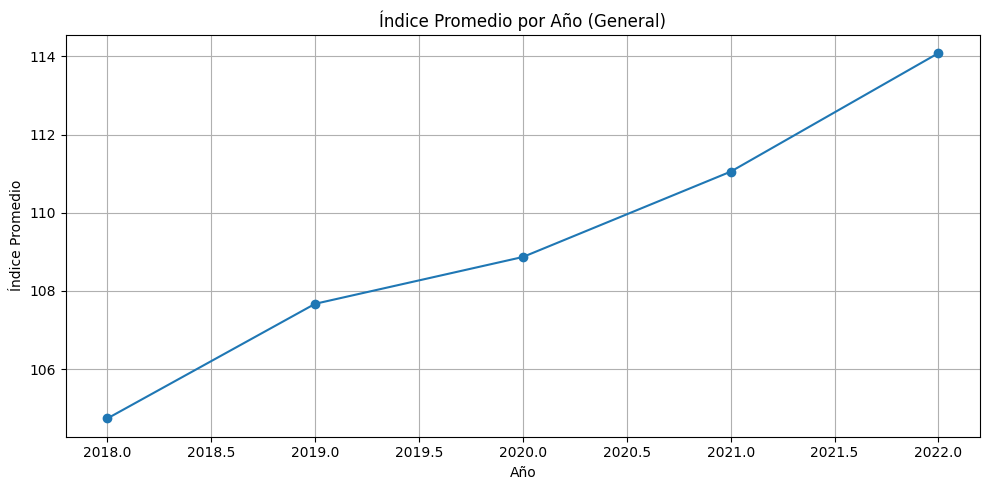

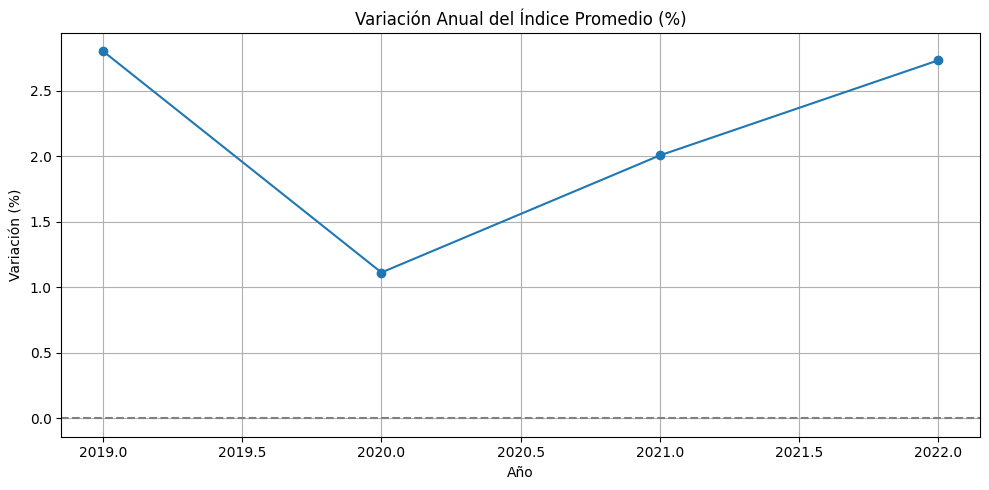

In [11]:
# Agrupar por año y calcular la media del índice
# Filter for 'Índice' and convert 'Total' to numeric
df_reducido_cleaned = df_reducido[df_reducido['Tipo de dato'] == 'Índice'].copy()
df_reducido_cleaned['Total'] = df_reducido_cleaned['Total'].astype(str).str.replace(',', '.', regex=False)
df_reducido_cleaned['Total'] = pd.to_numeric(df_reducido_cleaned['Total'], errors='coerce').fillna(0)


df_general = df_reducido_cleaned.groupby('Periodo', as_index=False).agg({'Total': 'mean'})
df_general['Variación anual (%)'] = df_general['Total'].pct_change() * 100

# Gráfico 1: Línea del índice promedio por año
plt.figure(figsize=(10, 5))
plt.plot(df_general['Periodo'], df_general['Total'], marker='o')
plt.title('Índice Promedio por Año (General)')
plt.xlabel('Año')
plt.ylabel('Índice Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Línea de variación anual promedio
plt.figure(figsize=(10, 5))
plt.plot(df_general['Periodo'], df_general['Variación anual (%)'], marker='o')
plt.title('Variación Anual del Índice Promedio (%)')
plt.xlabel('Año')
plt.ylabel('Variación (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

Los gráficos muestran la los índices de precio de alquiler, esto es, la evolución anual de los precios de la vivienda alquilada como residencia habitual de los hogares. La fuente de información utilizada para su cálculo es la base de datos proporcionada por la AEAT, que procede del modelo 100 de las declaraciones del IRPF.  

In [12]:
# Eliminamos el código postal (número inicial) directamente de la columna 'Municipio'
df_reducido_cleaned['Municipio'] = df_reducido_cleaned['Municipio'].str.replace(r'^\d{5}\s+', '', regex=True)
print(df_reducido_cleaned['Municipio'])


0        Total Nacional
1        Total Nacional
2        Total Nacional
3        Total Nacional
4        Total Nacional
              ...      
18024           Melilla
18025           Melilla
18026           Melilla
18027           Melilla
18028           Melilla
Name: Municipio, Length: 3760, dtype: object


In [13]:
# Vamos a ver el top 5 municipios con el índice de precio de vivienda en alquiler más alto y más bajo
# Agrupar por municipio y calcular el promedio del índice total desde 2018
df_2022 = df_reducido_cleaned[df_reducido_cleaned['Periodo'] == 2022].copy()
df_2022['Total'] = df_2022['Total'].astype(float)

# Calculamos el promedio
promedio_por_municipio = df_2022.groupby('Municipio', as_index=False).agg({'Total': 'mean'})

# Top 5 con índice más alto
top_5_altos = promedio_por_municipio.sort_values(by='Total', ascending=False).head(5)

# Top 5 con índice más bajo
top_5_bajos = promedio_por_municipio.sort_values(by='Total', ascending=True).head(5)

# Mostrar resultados
print("Top 5 municipios con índice más alto:")
print(top_5_altos)

print("\nTop 5 municipios con índice más bajo:")
print(top_5_bajos)

Top 5 municipios con índice más alto:
              Municipio    Total
413               Ocaña  129.659
41   Alhaurín el Grande  129.496
309               Jódar  128.232
539  Riba-roja de Túria  127.034
14                Albox  126.892

Top 5 municipios con índice más bajo:
                Municipio    Total
114                 Berja   92.833
722           Villamartín   99.712
440  Palos de la Frontera   99.782
160            Cantillana  100.592
438         Palma del Río  100.883


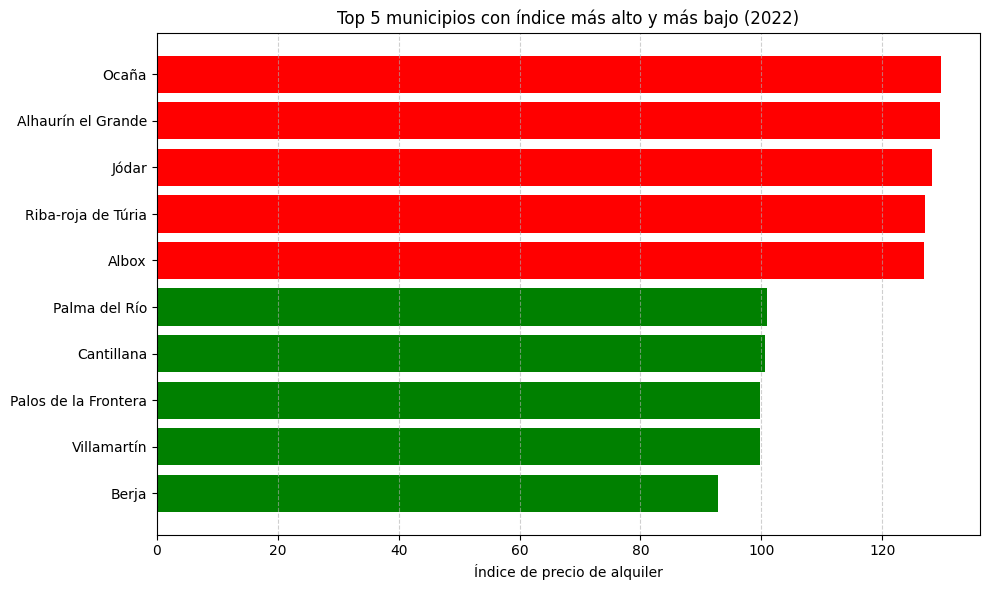

In [14]:
# Graficamos para mejor visualización

# Concatenar para graficar juntos
top_10 = pd.concat([top_5_altos, top_5_bajos])
top_10 = top_10.sort_values(by ='Total', ascending=True)



# Establecemos los colores para facilitar la distinción
colors = ['green' if municipio in top_5_bajos['Municipio'].values else 'red' for municipio in top_10['Municipio']]

# Crear nuevamente el gráfico solo con matplotlib sin herramientas auxiliares
plt.figure(figsize = (10, 6))
plt.barh(top_10['Municipio'], top_10['Total'], color = colors)
plt.xlabel('Índice de precio de alquiler')
plt.title('Top 5 municipios con índice más alto y más bajo (2022)')
plt.grid(axis ='x', linestyle ='--', alpha = 0.6)
plt.tight_layout()
plt.show()



# 2. IPVA PONDERACIONES ANUALES POR MUNICIPIO

In [15]:
df2 = pd.read_csv("IRAV 2024 2025.csv", sep=';')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo de dato  5 non-null      object
 1   Periodo       5 non-null      object
 2   Total         5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [17]:
df2.describe()

,Tipo de dato,Periodo,Total
count,5,5,5
unique,1,5,5
top,Variación anual,2025M03,"1,98"
freq,5,1,1


In [18]:
df2

,Tipo de dato,Periodo,Total
0,Variación anual,2025M03,"1,98"
1,Variación anual,2025M02,"2,08"
2,Variación anual,2025M01,"2,19"
3,Variación anual,2024M12,"2,28"
4,Variación anual,2024M11,"2,2"


# 3. PRECIO TASADO VIVIENDA LIBRE T4 2024 POR MUNICIPIO Y PROVINCIA

Vamos a analizar los datos que más nos interesan con relación al precio de vivienda. Se trata de un dataset que hemos configurado a partir de información obtenida del INE con los datos de precios de vivienda de muchos años, quedándonos con los datos de 2018 a 2024, comparando únicamente el 4º trimestre.


El motivo de elegir sólo un trimestre es facilitar la comparativa. Asimismo, hemos escogido los años 2018 y 2019 para tener datos anteriores a la pandemia Codvid-2019, ya que es previsible que haya variaciones desde ese momento.

In [19]:
df3 = pd.read_csv("Precio tasado vivienda libre 2018-2024 T4.csv", sep=';')

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Año                                 2098 non-null   int64 
 1   Provincia                           2098 non-null   object
 2   Municipio                           2098 non-null   object
 3   Hasta cinco años de antiguedad      779 non-null    object
 4   Con más de cinco años de antigedad  2097 non-null   object
 5   Total                               2098 non-null   object
dtypes: int64(1), object(5)
memory usage: 98.5+ KB


In [21]:
# Vamos a pasar los object a numéricos en las columnas numéricas
columnas_a_convertir = [
    'Hasta cinco años de antiguedad',
    'Con más de cinco años de antigedad',
    'Total'
]

# Reemplazamos comas por puntos, eliminando separadores de miles y convertimos a float
for col in columnas_a_convertir:
    df3[col] = (
        df3[col].astype(str)
                .str.replace(r'\.', '', regex=True)      # elimina puntos (separador de miles)
                .str.replace(',', '.', regex=False)      # cambia la coma decimal por punto
                .replace('nan', None)                    # evitar errores con texto 'nan'
                .astype(float)
    )

In [22]:
df3.describe()

,Año,Hasta cinco años de antiguedad,Con más de cinco años de antigedad,Total
count,2098.000000,779.000000,2097.000000,2098.000000
mean,2021.052431,2243.154172,1558.336862,1563.318589
std,1.986631,812.784422,728.093619,730.696938
min,2018.000000,886.300000,548.500000,550.200000
25%,2019.000000,1655.850000,1018.600000,1020.725000
50%,2021.000000,2068.000000,1377.000000,1383.200000
75%,2023.000000,2642.200000,1955.900000,1964.125000
max,2024.000000,5737.200000,5830.200000,5825.700000


Tenemos nulos en dos columnas, particularmente en la columna de hasta 5 años de antigüedad. Sin embargo, para este estudio no nos importa la antigüedad de la vivienda, sino el valor general de la vivienda por pronvicia y municipio. Es por esto que no vamos a tratar estos nulos y nos centramos en la columna "total" que no contiene nulos.

In [23]:
df3

,Año,Provincia,Municipio,Hasta cinco años de antiguedad,Con más de cinco años de antigedad,Total
0,2024,Almería,Almería,2068.2,1466.1,1489.6
1,2024,Almería,Nijar,NaN,1193.3,1199.1
2,2024,Almería,Roquetas de Mar,NaN,1433.5,1433.3
3,2024,Almería,Ejido (El),1529.4,1072.6,1081.6
4,2024,Cádiz,Algeciras,NaN,1251.5,1252.4
...,...,...,...,...,...,...
2093,2018,Bizkaia,Santurtzi,NaN,2030.2,2034.5
2094,2018,Bizkaia,Sestao,NaN,1615.8,1617.0
2095,2018,La Rioja,Logroño,NaN,1151.9,1156.3
2096,2018,Ceuta,Ceuta,NaN,1693.3,1701.8


In [24]:
# Asegurarse de que 'Total' es float
df3['Total'] = df3['Total'].astype(float)

# Vamos a crear listas para almacenar los resultados por año
top_altos_por_año = []
top_bajos_por_año = []

# Para obtener los resultados por año, vamos a iterar por cada año único
for año in sorted(df3['Año'].unique()):
    # Filtrar el DataFrame para el año actual
    df_año = df3[df3['Año'] == año].copy()

    # Agrupamos por municipio y calculamos el promedio, en el caso de que haya más de un dato por municipio
    promedio_por_municipio = df_año.groupby('Municipio', as_index=False)['Total'].mean()

    # Top 5 más altos
    top_5_altos = promedio_por_municipio.sort_values(by='Total', ascending=False).head(5)
    top_5_altos['Año'] = año
    top_altos_por_año.append(top_5_altos)

    # Top 5 más bajos
    top_5_bajos = promedio_por_municipio.sort_values(by='Total', ascending=True).head(5)
    top_5_bajos['Año'] = año
    top_bajos_por_año.append(top_5_bajos)

# Unimos los resultados en dos dataframes
df_top_altos = pd.concat(top_altos_por_año, ignore_index = True)
df_top_bajos = pd.concat(top_bajos_por_año, ignore_index = True)

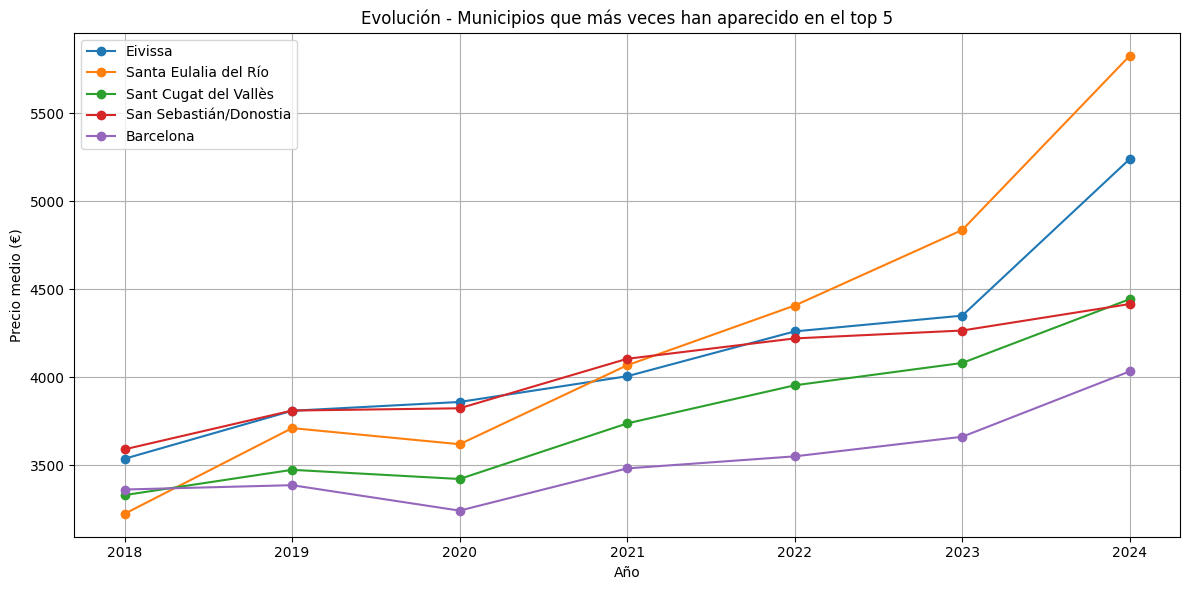

In [25]:
# Vamos a mostrar los municipios que más veces aparecen en el top 5 desde 2018, mostrando su evolución desde 2018 hasta 2024
# Contar apariciones en el top
conteo = df_top_altos['Municipio'].value_counts().head(5).index.tolist()

# Filtrar y graficar esos
df_evolucion_frecuentes = df3[df3['Municipio'].isin(conteo)].groupby(['Año', 'Municipio'])['Total'].mean().reset_index()

plt.figure(figsize=(12, 6))
for municipio in conteo:
    datos = df_evolucion_frecuentes[df_evolucion_frecuentes['Municipio'] == municipio]
    plt.plot(datos['Año'], datos['Total'], marker='o', label=municipio)

plt.title('Evolución - Municipios que más veces han aparecido en el top 5')
plt.xlabel('Año')
plt.ylabel('Precio medio (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

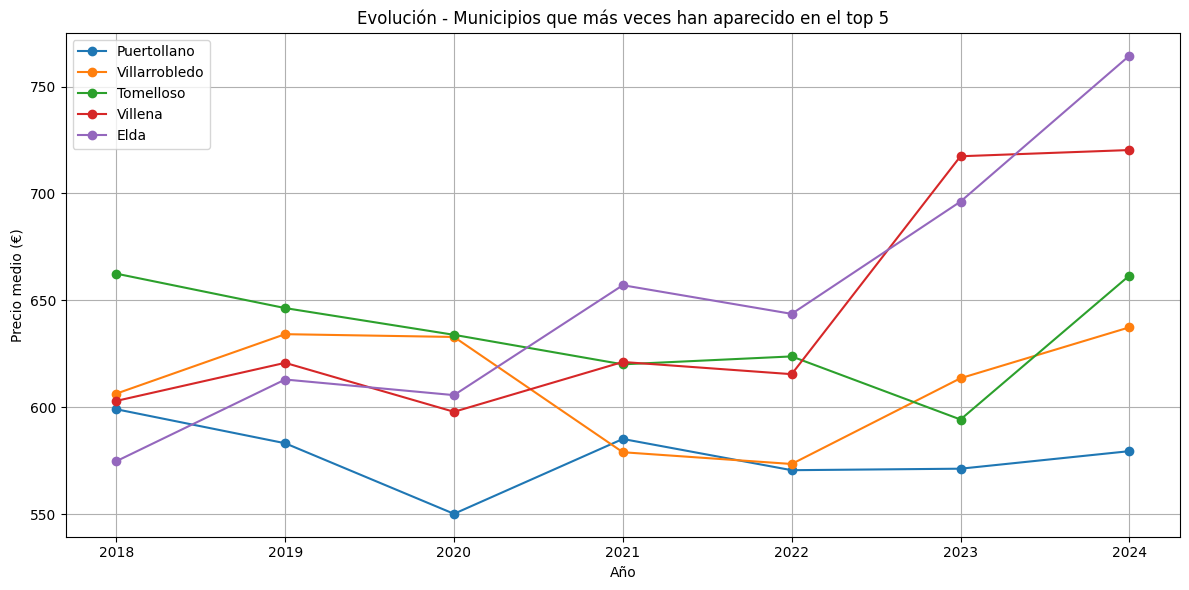

In [26]:
# Vamos a mostrar los municipios que más veces aparecen en el top 5 desde 2018, mostrando su evolución desde 2018 hasta 2024
# Contar apariciones en el top
conteo = df_top_bajos['Municipio'].value_counts().head(5).index.tolist()

# Filtrar y graficar esos
df_evolucion_frecuentes = df3[df3['Municipio'].isin(conteo)].groupby(['Año', 'Municipio'])['Total'].mean().reset_index()

plt.figure(figsize=(12, 6))
for municipio in conteo:
    datos = df_evolucion_frecuentes[df_evolucion_frecuentes['Municipio'] == municipio]
    plt.plot(datos['Año'], datos['Total'], marker='o', label=municipio)

plt.title('Evolución - Municipios que más veces han aparecido en el top 5')
plt.xlabel('Año')
plt.ylabel('Precio medio (€)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Estos valores representan euros por metro cuadrado.


/tmp/ipython-input-27-696293801.py:16: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


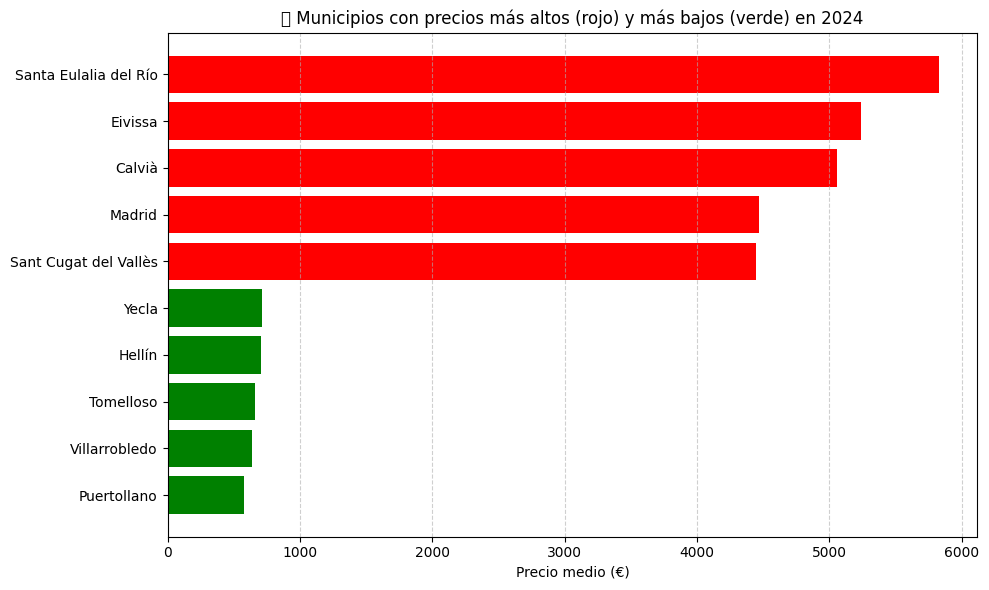

In [27]:
# Filtrar top altos y bajos del año 2024
df_2024_altos = df_top_altos[df_top_altos['Año'] == 2024]
df_2024_bajos = df_top_bajos[df_top_bajos['Año'] == 2024]

# Unir y asignar color
df_2024 = pd.concat([df_2024_altos, df_2024_bajos])
df_2024['Color'] = df_2024['Municipio'].isin(df_2024_altos['Municipio']).map({True: 'red', False: 'green'})
df_2024 = df_2024.sort_values(by='Total', ascending=True)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_2024['Municipio'], df_2024['Total'], color=df_2024['Color'])
plt.xlabel('Precio medio (€)')
plt.title('🏙️ Municipios con precios más altos (rojo) y más bajos (verde) en 2024')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

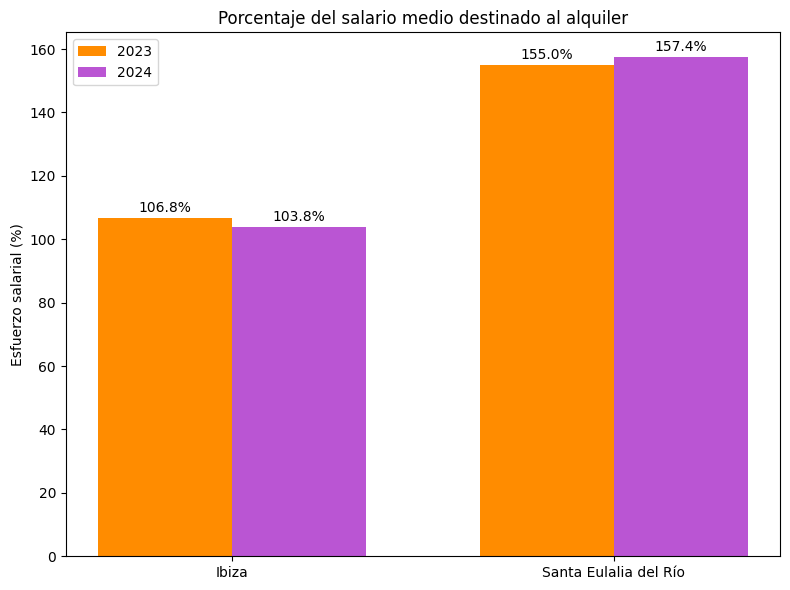

In [28]:
# Reimportamos bibliotecas y volvemos a generar el gráfico tras el reinicio del entorno
import matplotlib.pyplot as plt

# Datos de esfuerzo salarial
municipios = ['Ibiza', 'Santa Eulalia del Río']
salario_mensual_2023 = 2337.5  # Aprox. 28.050 €/año
salario_mensual_2024 = 2490    # Aprox. 29.880 €/año

alquiler_2023 = [2496, 3623]  # Estimados con reducción de ~3.5% y 8.2% sobre los valores de 2024
alquiler_2024 = [2584, 3919]

# Cálculo del esfuerzo salarial como porcentaje
esfuerzo_2023 = [(a / salario_mensual_2023) * 100 for a in alquiler_2023]
esfuerzo_2024 = [(a / salario_mensual_2024) * 100 for a in alquiler_2024]

# Gráfico
x = range(len(municipios))
width = 0.35

colors = ['darkorange', 'mediumorchid']  # 2023 = naranja, 2024 = violeta

plt.figure(figsize=(8,6))
bars_2023 = plt.bar([i - width/2 for i in x], esfuerzo_2023, width, label='2023', color=colors[0])
bars_2024 = plt.bar([i + width/2 for i in x], esfuerzo_2024, width, label='2024', color=colors[1])

plt.xticks(x, municipios)
plt.ylabel('Esfuerzo salarial (%)')
plt.title('Porcentaje del salario medio destinado al alquiler')
plt.legend()
for bar in bars_2023 + bars_2024:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 4. SEGUNDAS RESIDENCIAS DE LOS HOGARES

Datos municipales (municipios de más de 50.000 habitantes y capitales de provincia)

In [29]:
df_4 = pd.read_csv('Clasificacion segunda residencia por nacionalidad.csv', sep=';')

In [30]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Municipio                           151 non-null    object 
 1   Con segunda residencia total        151 non-null    float64
 2   Con segunda residencia nacionales   151 non-null    float64
 3   Con segunda residencia extranjeros  151 non-null    object 
 4   Residencia habitual total           151 non-null    float64
 5   Residencia habitual nacionales      151 non-null    float64
 6   Residencia habitual extranjeros     151 non-null    float64
 7   Total                               151 non-null    object 
 8   Total nacionales                    151 non-null    object 
 9   Total extranjeros                   151 non-null    float64
dtypes: float64(6), object(4)
memory usage: 11.9+ KB


In [31]:
# Veos que tenemos columnas con valor object, por lo que tenemos que pasarlas a numéricas
for col in df_4.columns[1:]:
    df_4[col] = df_4[col].replace({r'\.': ''}, regex=True)
    df_4[col] = pd.to_numeric(df_4[col], errors='coerce')

In [32]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Municipio                           151 non-null    object 
 1   Con segunda residencia total        151 non-null    float64
 2   Con segunda residencia nacionales   151 non-null    float64
 3   Con segunda residencia extranjeros  27 non-null     float64
 4   Residencia habitual total           151 non-null    float64
 5   Residencia habitual nacionales      151 non-null    float64
 6   Residencia habitual extranjeros     151 non-null    float64
 7   Total                               151 non-null    int64  
 8   Total nacionales                    151 non-null    int64  
 9   Total extranjeros                   151 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


In [33]:
df_4.describe()

,Con segunda residencia total,Con segunda residencia nacionales,Con segunda residencia extranjeros,Residencia habitual total,Residencia habitual nacionales,Residencia habitual extranjeros,Total,Total nacionales,Total extranjeros
count,151.000000,151.000000,27.000000,151.000000,151.000000,151.000000,1.510000e+02,1.510000e+02,151.000000
mean,11.876722,15.769695,1051.666667,53.917013,44.717775,140.330318,6.579374e+04,5.594237e+04,126.937510
std,28.991372,61.283889,2199.292421,91.885952,72.061890,288.650749,1.203820e+05,9.868215e+04,275.817709
min,1.002000,1.144000,153.000000,10.718000,9.407000,1.004000,1.466900e+04,1.112500e+04,1.009000
25%,3.176500,2.980500,299.500000,23.301000,18.653000,1.927500,2.658350e+04,2.159600e+04,1.895500
50%,5.465000,5.263000,473.000000,29.581000,24.846000,3.859000,3.452100e+04,3.046300e+04,3.932000
75%,11.473000,11.145000,779.000000,53.802000,47.338000,13.057500,6.854450e+04,6.056750e+04,13.435500
max,321.468000,687.000000,11774.000000,962.242000,762.095000,994.000000,1.283710e+06,1.062201e+06,994.000000


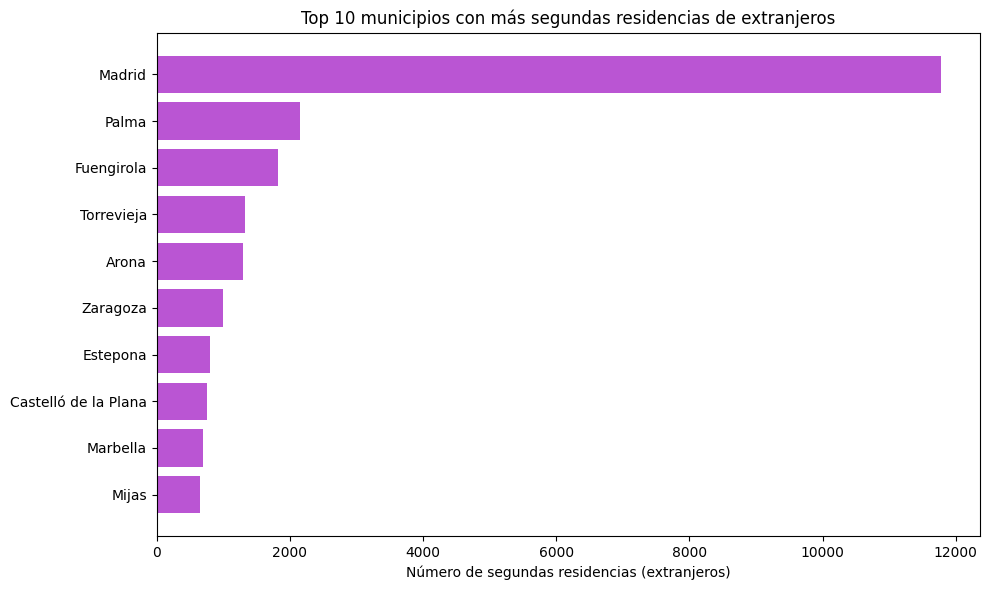

In [34]:
# Calculamos el top 10 de municipios con más segundas residencias de extranjeros
top_10_sr_extranjeros = df_4.nlargest(10, "Con segunda residencia extranjeros")[["Municipio", "Con segunda residencia extranjeros"]]

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_sr_extranjeros["Municipio"], top_10_sr_extranjeros["Con segunda residencia extranjeros"], color="mediumorchid")
plt.xlabel("Número de segundas residencias (extranjeros)")
plt.title("Top 10 municipios con más segundas residencias de extranjeros")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Liderazgo absoluto de Madrid
Madrid concentra más de 11.700 segundas residencias de extranjeros, muy por encima del resto.

Esto podría indicar inversión extranjera con fines no vacacionales, como negocios, movilidad internacional o residencia de larga duración sin cambio de empadronamiento.

Foco vacacional: Palma, Fuengirola, Torrevieja, Arona.
El resto del top 10 incluye destinos turísticos mediterráneos y canarios, reflejando claramente un patrón de residencia estacional o turística.

Municipios como Marbella, Mijas o Castelló de la Plana siguen figurando como referentes del atractivo inmobiliario para extranjeros.



In [35]:
df_4['Con segunda residencia nacionales'].describe()

,Con segunda residencia nacionales
count,151.000000
mean,15.769695
std,61.283889
min,1.144000
25%,2.980500
50%,5.263000
75%,11.145000
max,687.000000


In [36]:
madrid_segunda_nacionales = df_4[df_4["Municipio"].str.upper() == "MADRID"]["Con segunda residencia nacionales"].values
madrid_segunda_extranjeros = df_4[df_4["Municipio"].str.upper() == "MADRID"]["Con segunda residencia extranjeros"].values
print(madrid_segunda_nacionales)
print(madrid_segunda_extranjeros)

[300.106]
[11774.]


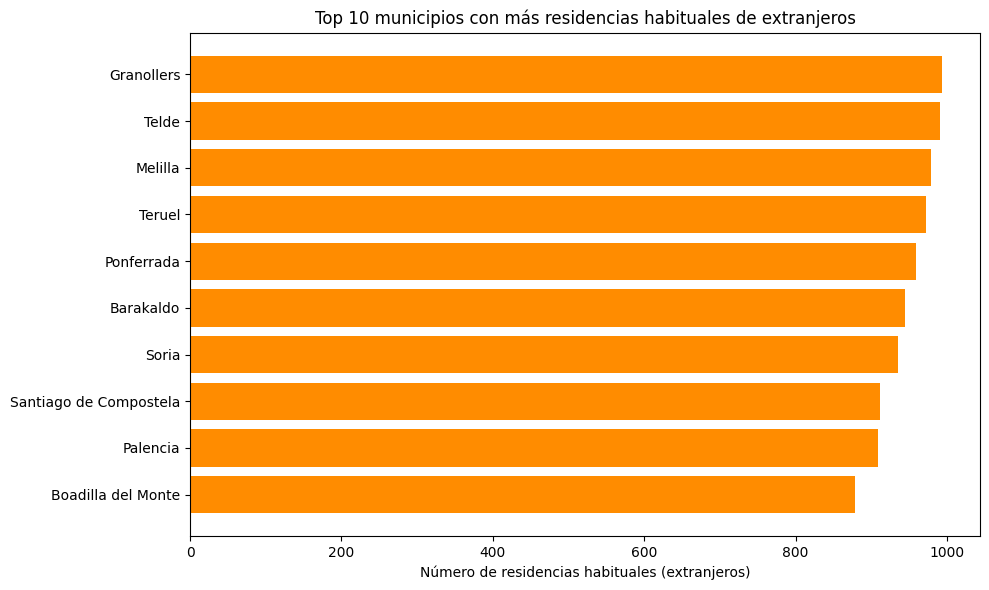

In [37]:
# Extraemos el top 10 municipios con más residencias habituales de extranjeros
top_10_habitual_extranjeros = df_4[["Municipio", "Residencia habitual extranjeros"]].sort_values(
    by="Residencia habitual extranjeros", ascending=False).head(10)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(top_10_habitual_extranjeros["Municipio"], top_10_habitual_extranjeros["Residencia habitual extranjeros"], color="darkorange")
plt.xlabel("Número de residencias habituales (extranjeros)")
plt.title("Top 10 municipios con más residencias habituales de extranjeros")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


A diferencia del gráfico de segundas residencias, este ranking está liderado por municipios no turísticos ni costeros: Granollers, Telde, Melilla o Teruel.

Se trata en su mayoría de localidades medianas o del interior, lo que indica presencia de población extranjera con arraigo permanente (trabajo, familia o residencia principal).

Estos patrones sugieren una distribución de extranjeros más diversa cuando se trata de vivienda habitual, frente al sesgo turístico de las segundas residencias.